
# Exercise 5 (Spark in Scala)   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     [4 points]
---

For this exercise, you will work on this JupyterLab notebook, and solve the tasks listed herein. These tasks, in addition to writing Spark code, require you to analyse various query plans and to reason about them.

To familiarise yourself with Spark and the Scala language, we also provide you with two JupyterLab notebooks, namely Notebook 1 and Notebook 2, which you can upload on JupyterLab and run yourself. To get a deeper understanding, and look up the types and definitions of various functions, we recommend that you visit the Spark and Spark SQL documentation.

## a) From SQL to Dataframe (and back again)

#### Find for each of the Spark SQL queries an equivalent one that only uses the Dataframe API (or vice versa)


In [1]:
val articlesDF = spark.read.options(Map("header"->"true")).format("csv").load("/home/adbs22/shared/hm/articles.csv")
val customersDF = spark.read.options(Map("header"->"true")).format("csv").load("/home/adbs22/shared/hm/customers.csv")
val transactionsDF = spark.read.options(Map("header"->"true")).format("csv").load("/home/adbs22/shared/hm/transactions.csv")


// Creating the views for SparkSQL
articlesDF.createOrReplaceTempView("articles")
customersDF.createOrReplaceTempView("customers")
transactionsDF.createOrReplaceTempView("transactions")

Intitializing Scala interpreter ...

Spark Web UI available at http://c100.local:8088/proxy/application_1647527369838_1289
SparkContext available as 'sc' (version = 2.4.0-cdh6.3.2, master = yarn, app id = application_1647527369838_1289)
SparkSession available as 'spark'


articlesDF: org.apache.spark.sql.DataFrame = [article_id: string, product_code: string ... 23 more fields]
customersDF: org.apache.spark.sql.DataFrame = [customer_id: string, FN: string ... 5 more fields]
transactionsDF: org.apache.spark.sql.DataFrame = [t_dat: string, customer_id: string ... 3 more fields]


In [2]:
articlesDF.printSchema()
customersDF.printSchema()
transactionsDF.printSchema()

root
 |-- article_id: string (nullable = true)
 |-- product_code: string (nullable = true)
 |-- prod_name: string (nullable = true)
 |-- product_type_no: string (nullable = true)
 |-- product_type_name: string (nullable = true)
 |-- product_group_name: string (nullable = true)
 |-- graphical_appearance_no: string (nullable = true)
 |-- graphical_appearance_name: string (nullable = true)
 |-- colour_group_code: string (nullable = true)
 |-- colour_group_name: string (nullable = true)
 |-- perceived_colour_value_id: string (nullable = true)
 |-- perceived_colour_value_name: string (nullable = true)
 |-- perceived_colour_master_id: string (nullable = true)
 |-- perceived_colour_master_name: string (nullable = true)
 |-- department_no: string (nullable = true)
 |-- department_name: string (nullable = true)
 |-- index_code: string (nullable = true)
 |-- index_name: string (nullable = true)
 |-- index_group_no: string (nullable = true)
 |-- index_group_name: string (nullable = true)
 |-- sec

#### Query 1: Transform the given Spark SQL query into the Dataframe API

In [3]:
val query1 = spark.sql("SELECT COUNT(*) FROM articles WHERE department_name = 'Socks'  ")
query1.show() // 'false' turns of truncation of row entries
query1.explain()

+--------+
|count(1)|
+--------+
|     216|
+--------+

== Physical Plan ==
*(2) HashAggregate(keys=[], functions=[count(1)])
+- Exchange SinglePartition
   +- *(1) HashAggregate(keys=[], functions=[partial_count(1)])
      +- *(1) Project
         +- *(1) Filter (isnotnull(department_name#25) && (department_name#25 = Socks))
            +- *(1) FileScan csv [department_name#25] Batched: false, Format: CSV, Location: InMemoryFileIndex[hdfs://nameservice1/home/adbs22/shared/hm/articles.csv], PartitionFilters: [], PushedFilters: [IsNotNull(department_name), EqualTo(department_name,Socks)], ReadSchema: struct<department_name:string>


query1: org.apache.spark.sql.DataFrame = [count(1): bigint]


In [4]:
val query1DF =  articlesDF.filter($"department_name" === "Socks").groupBy().count()
query1DF.show()
query1DF.explain()

+-----+
|count|
+-----+
|  216|
+-----+

== Physical Plan ==
*(2) HashAggregate(keys=[], functions=[count(1)])
+- Exchange SinglePartition
   +- *(1) HashAggregate(keys=[], functions=[partial_count(1)])
      +- *(1) Project
         +- *(1) Filter (isnotnull(department_name#25) && (department_name#25 = Socks))
            +- *(1) FileScan csv [department_name#25] Batched: false, Format: CSV, Location: InMemoryFileIndex[hdfs://nameservice1/home/adbs22/shared/hm/articles.csv], PartitionFilters: [], PushedFilters: [IsNotNull(department_name), EqualTo(department_name,Socks)], ReadSchema: struct<department_name:string>


query1DF: org.apache.spark.sql.DataFrame = [count: bigint]


#### Query 2: Transform the given Dataframe API query into Spark SQL

In [5]:
val query2 = customersDF.groupBy("postal_code").count()
query2.show(false) // 'false' turns of truncation of row entries
query2.explain()

+----------------------------------------------------------------+-----+
|postal_code                                                     |count|
+----------------------------------------------------------------+-----+
|131fe107697ffef76c5e80b8de891b2049ff864f0deed33796e8de19f8f1829a|3    |
|2bda2436ba63a34b848b0358d160bc38e8ecf9e003b26513544f4e9494893dbf|5    |
|49d7d76808ed7defd257048c2f43e9847ce237d4a2d93af764e58ed3cb15bf66|5    |
|4988d36269883caba67885c889394a16cabbee2935bf80322ac21ad9911373d2|3    |
|41781cd70a8e5c55624a6bbb485b129f0a2dfd321f512259dd1b8452d2b1f1ff|1    |
|afb6a0ab56193e7c92723e4030a13c31fa94c6ac86948cd8431aa7089aa45ec1|8    |
|f8cda3e975c2a61f5ea2a500205ecf8537824fca0776cfac81bd84df7decf546|8    |
|8a993cab7c22118a48611df7f38e7137c1a518c882163480154130b439290dba|11   |
|83e95b655ce78d679329ae2cc8aaa133072d812d0772802167373ca6f50ee4d9|7    |
|e853856b19a6b760e7a01621dac53eca92639bcc71d8bfb78264069e297c282d|11   |
|c41643b05ed54082e5190f0b0bff002ef40d7a31c091907c7b

query2: org.apache.spark.sql.DataFrame = [postal_code: string, count: bigint]


In [6]:
val query2SQL =  spark.sql("SELECT postal_code, count(*) FROM customers GROUP BY postal_code")
query2SQL.show(false)
query2SQL.explain

+----------------------------------------------------------------+--------+
|postal_code                                                     |count(1)|
+----------------------------------------------------------------+--------+
|fc3c6bc74f467db65b2cb4f3a4f4104c5e339cce33b96c1b38f79661674cd1e2|3       |
|510b1a4ce6a8fda144f40365b40b32664b4f77226e1db6875b757b395619f733|14      |
|1fe93f2b86f98a6e270ddbcb8aeb9f2039cdfa17245eebe4c143df5ff0159bbd|9       |
|84f17da09cfb91e84b19a8c6aff58ac9c8947de34091aedcf0d0345ea2299169|4       |
|7cf63acedce32f6b04262e236f3cc2cc2ab1c470033597157a752ca44009c730|7       |
|838b84791a4a90f4c14959119d301fe68564fab032bdcc1233920408e5591550|9       |
|565b7afce6763479797eda364980d00749eb5ea31f264ebbaf3ceabc0defa6e0|3       |
|b6b30a01a78c99b60ddc6df513072e548a1a37c0fbd6b553a6b58185cf083102|2       |
|161ea7adcc566a1127b3e629baddbcdde6fd7a91360c0455f4d4acefbadda072|15      |
|89e94e92594c9fde8cdcac3aded0fb59f3e3aba6b58f66bbddf80ec5690c0867|1       |
|17f643a11d5

query2SQL: org.apache.spark.sql.DataFrame = [postal_code: string, count(1): bigint]


#### Query 3: Transform the given Dataframe API query into Spark SQL

In [7]:
val subquery = 
        "( select garment_group_name , prod_name, " +
        "row_number() over (partition by garment_group_name order by count(prod_name) desc) as seqnum " +
        "from articles a1 " +
        "group by garment_group_name, prod_name )"

// You can find more details on the row_number function here: https://sparkbyexamples.com/spark/spark-sql-add-row-number-dataframe/
// To define windows for row number, you will need to import the Window object via "import org.apache.spark.sql.expressions.Window"

val query = "SELECT garment_group_name, prod_name " +
            "FROM " + subquery +
            " WHERE seqnum = 1 "


val query3 = spark.sql(query)
query3.show(false) // 'false' turns of truncation of row entries
query3.explain()

+-----------------------------+-------------------------+
|garment_group_name           |prod_name                |
+-----------------------------+-------------------------+
|Blouses                      |Despacito                |
|Socks and Tights             |1pk Fun                  |
|Jersey Fancy                 |Dragonfly dress          |
|Outdoor                      |SB Cliff vest TP         |
|Swimwear                     |TOM FANCY                |
|Dresses/Skirts girls         |Elva Dress               |
|Special Offers               |Mini me kids             |
|Unknown                      |SUPREME FANCY TIGHTS     |
|Knitwear                     |TP Paddington Sweater    |
|Woven/Jersey/Knitted mix Baby|TVP Klimt denim          |
|Skirts                       |CHARLIE SKIRT            |
|Accessories                  |SBC OWN                  |
|Trousers                     |Luna skinny RW           |
|Under-, Nightwear            |Robin 3pk Fancy          |
|Shirts       

subquery: String = ( select garment_group_name , prod_name, row_number() over (partition by garment_group_name order by count(prod_name) desc) as seqnum from articles a1 group by garment_group_name, prod_name )
query: String = "SELECT garment_group_name, prod_name FROM ( select garment_group_name , prod_name, row_number() over (partition by garment_group_name order by count(prod_name) desc) as seqnum from articles a1 group by garment_group_name, prod_name ) WHERE seqnum = 1 "
query3: org.apache.spark.sql.DataFrame = [garment_group_name: string, prod_name: string]


In [8]:
import org.apache.spark.sql.expressions.Window // imports the needed Window object
/*
val subquery = 
        "( select garment_group_name , prod_name, " +
        "row_number() over (partition by garment_group_name order by count(prod_name) desc) as seqnum " +
        "from articles a1 " +
        "group by garment_group_name, prod_name )"

// You can find more details on the row_number function here: https://sparkbyexamples.com/spark/spark-sql-add-row-number-dataframe/
// To define windows for row number, you will need to import the Window object via "import org.apache.spark.sql.expressions.Window"

val query = "SELECT garment_group_name, prod_name " +
            "FROM " + subquery +
            " WHERE seqnum = 1 "*/

val windowSpec  =  Window.partitionBy("garment_group_name").orderBy("prod_name")


val query3DF= articlesDF.withColumn("seqnum", row_number().over(windowSpec)).filter($"seqnum" === 1).select("garment_group_name", "prod_name")


query3DF.show(false) // 'false' turns of truncation of row entries
query3DF.explain()

+-----------------------------+---------------------------+
|garment_group_name           |prod_name                  |
+-----------------------------+---------------------------+
|Blouses                      |&DENIM Lou shirtdress      |
|Socks and Tights             |1 Pk Chess                 |
|Jersey Fancy                 |+ 2-pack Energy fitted tank|
|Outdoor                      |&DENIM Jacket Daisy Garden |
|Swimwear                     |+ Adele shape Swimsuit     |
|Dresses/Skirts girls         |AGNETA STRAP DRESS         |
|Special Offers               |AK Aiko hoodie             |
|Unknown                      |+ Nora shorts              |
|Knitwear                     |2PACK Nils sweater         |
|Woven/Jersey/Knitted mix Baby|2PACK Niffler              |
|Skirts                       |ADA MIDI SKIRT             |
|Accessories                  |10p Basic Terry            |
|Trousers                     |&DENIM Bootcut RW soho     |
|Under-, Nightwear            |2 pk Trop

import org.apache.spark.sql.expressions.Window
windowSpec: org.apache.spark.sql.expressions.WindowSpec = org.apache.spark.sql.expressions.WindowSpec@127f56e0
query3DF: org.apache.spark.sql.DataFrame = [garment_group_name: string, prod_name: string]


#### Query 4: Transform the given Dataframe API query into Spark SQL

In [9]:
val query4 = articlesDF
      .join(transactionsDF, articlesDF("article_id") === transactionsDF("article_id"))
      .join(customersDF, customersDF("customer_id") === transactionsDF("customer_id"))
      .filter("age > 30 AND (department_name = 'Jersey Basic' OR department_name = 'Shirt') ")
      .groupBy(customersDF("customer_id"))
      .agg(count(transactionsDF("t_dat")).as("count_transactions"))
      .orderBy(desc("count_transactions"))
query4.show(false) // 'false' turns of truncation of row entries
query4.explain()

+----------------------------------------------------------------+------------------+
|customer_id                                                     |count_transactions|
+----------------------------------------------------------------+------------------+
|91f3ab5944411eb3f6f79e93ab430f3d4ff92e5a5d4475c3d85d47be261fd95d|186               |
|9478a9e051336b0373b07172ef96ed923cb50e0d54a7e3998250c9f5ccad2382|168               |
|8de98d98789e2d90eb7d8b3b631e0a7d895aba860124a20e26c388998437b757|157               |
|c6e14fffa49db6ba1f4f95a985d4b5a1ca5e6b3611fed5de9b77d201c4ba20b8|136               |
|4308983955108b3af43ec57f0557211e44462a5633238351fff14c8b51f16093|133               |
|ebc0f83524828ee05e9dc70b50d21a261000d2015f6b2006289199a93ccf0702|130               |
|d5902b0523749b377ab32f6de5e9a739cf690bb8dd0aa554f23d4b15937152dc|120               |
|c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa|111               |
|ec2586bde1b5db78160bc5ec8796df8563ecbf8c0403ed7b1e935

query4: org.apache.spark.sql.Dataset[org.apache.spark.sql.Row] = [customer_id: string, count_transactions: bigint]


In [10]:
val query =  "SELECT c.customer_id, count(t.t_dat) as count_transactions "+
    "FROM articles a, transactions t, customers c WHERE a.article_id = t.article_id AND c.customer_id = t.customer_id  AND "+
    "age > 30 AND (department_name = 'Jersey Basic' OR department_name = 'Shirt') " + 
    "GROUP BY c.customer_id "+ 
    "ORDER BY count_transactions desc"


val query4SQL =  spark.sql(query)
query4SQL.show(false) // 'false' turns of truncation of row entries
query4SQL.explain()

+----------------------------------------------------------------+------------------+
|customer_id                                                     |count_transactions|
+----------------------------------------------------------------+------------------+
|91f3ab5944411eb3f6f79e93ab430f3d4ff92e5a5d4475c3d85d47be261fd95d|186               |
|9478a9e051336b0373b07172ef96ed923cb50e0d54a7e3998250c9f5ccad2382|168               |
|8de98d98789e2d90eb7d8b3b631e0a7d895aba860124a20e26c388998437b757|157               |
|c6e14fffa49db6ba1f4f95a985d4b5a1ca5e6b3611fed5de9b77d201c4ba20b8|136               |
|4308983955108b3af43ec57f0557211e44462a5633238351fff14c8b51f16093|133               |
|ebc0f83524828ee05e9dc70b50d21a261000d2015f6b2006289199a93ccf0702|130               |
|d5902b0523749b377ab32f6de5e9a739cf690bb8dd0aa554f23d4b15937152dc|120               |
|c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa|111               |
|ec2586bde1b5db78160bc5ec8796df8563ecbf8c0403ed7b1e935

query: String = SELECT c.customer_id, count(t.t_dat) as count_transactions FROM articles a, transactions t, customers c WHERE a.article_id = t.article_id AND c.customer_id = t.customer_id  AND age > 30 AND (department_name = 'Jersey Basic' OR department_name = 'Shirt') GROUP BY c.customer_id ORDER BY count_transactions desc
query4SQL: org.apache.spark.sql.DataFrame = [customer_id: string, count_transactions: bigint]


---

- ### **b) Wide and Narrow Dependencies**

You are given a DAG visualisation of how Spark executed a query in various stages, with arrows indicating various parts of the query plan. 


Here is the query plan of query4. 

Here is the final query plan which Spark produces (exported from the internal Web UI).

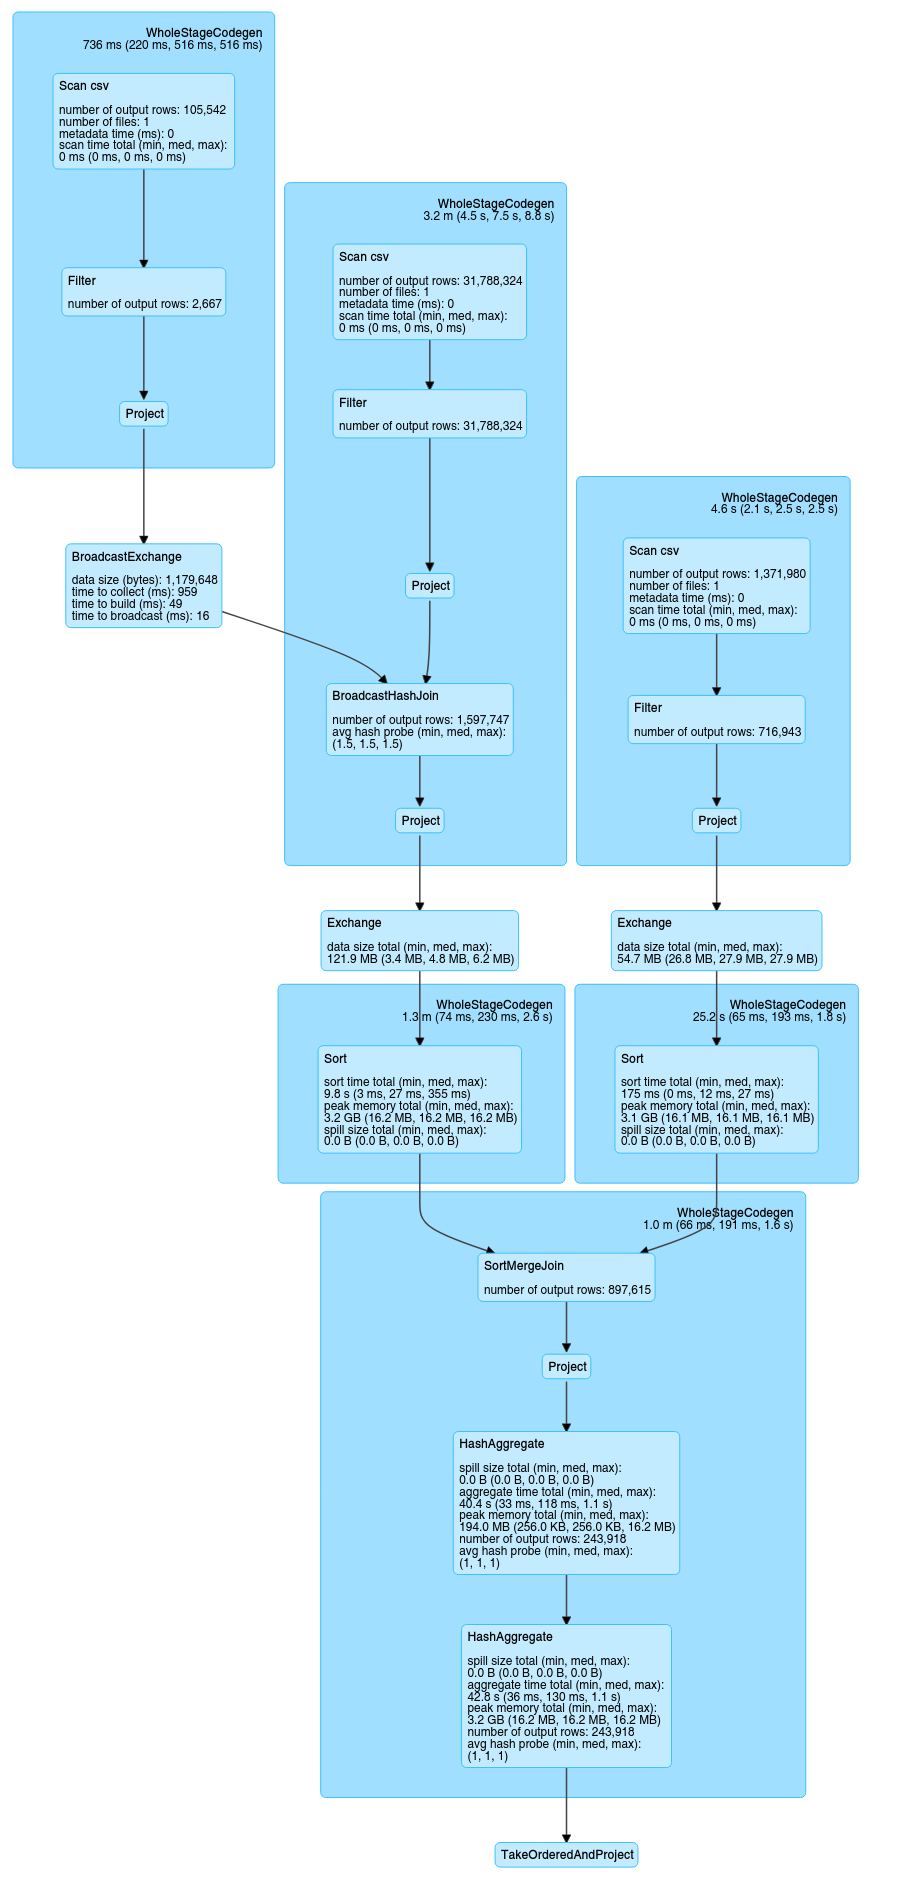



Analyse the dependencies and stages of the queries, and try to determine which commands of the query plan are  executed as wide dependencies and which as narrow dependencies.